In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load your dataset
file_path = '/content/drive/MyDrive/Defense help/Nazmul bro/Depressed and non depressed persons text Dataset.csv'
df = pd.read_csv(file_path)

In [9]:
# Check the structure of your dataset
df.head()

,Collected Text,Depression score
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


**Pre-Processing**

In [10]:
# Preprocess the text data
clean_text = df['Collected Text']
is_depression = df['Depression score']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(clean_text, is_depression, test_size=0.3, random_state=42)

In [12]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [13]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Algorithms

Logistic Regression Results:
Accuracy: 0.9560344827586207
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1177
           1       0.97      0.94      0.95      1143

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320

Confusion Matrix:
[[1149   28]
 [  74 1069]]


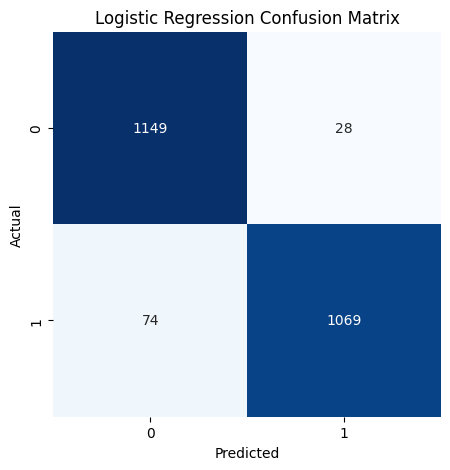

In [14]:
# Logistic Regression
logistic_clf = LogisticRegression(random_state=42)
logistic_clf.fit(X_train_tfidf, y_train)
logistic_pred = logistic_clf.predict(X_test_tfidf)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred)
logistic_cm = confusion_matrix(y_test, logistic_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {logistic_accuracy}")
print("Classification Report:")
print(logistic_report)
print("Confusion Matrix:")
print(logistic_cm)
plot_confusion_matrix(logistic_cm, 'Logistic Regression Confusion Matrix')
print("\n" + "="*50 + "\n")

Random Forest Results:
Accuracy: 0.9568965517241379
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1177
           1       1.00      0.92      0.95      1143

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320

Confusion Matrix:
[[1173    4]
 [  96 1047]]


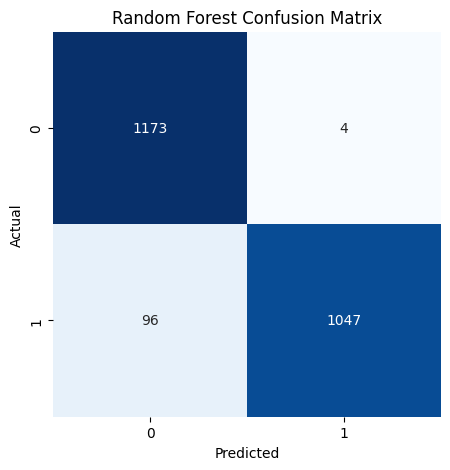

In [15]:
# Random Forest
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train_tfidf, y_train)
random_forest_pred = random_forest_clf.predict(X_test_tfidf)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_report = classification_report(y_test, random_forest_pred)
random_forest_cm = confusion_matrix(y_test, random_forest_pred)

print("Random Forest Results:")
print(f"Accuracy: {random_forest_accuracy}")
print("Classification Report:")
print(random_forest_report)
print("Confusion Matrix:")
print(random_forest_cm)
plot_confusion_matrix(random_forest_cm, 'Random Forest Confusion Matrix')
print("\n" + "="*50 + "\n")

Gradient Boosting Results:
Accuracy: 0.9525862068965517
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1177
           1       0.99      0.91      0.95      1143

    accuracy                           0.95      2320
   macro avg       0.96      0.95      0.95      2320
weighted avg       0.96      0.95      0.95      2320

Confusion Matrix:
[[1167   10]
 [ 100 1043]]


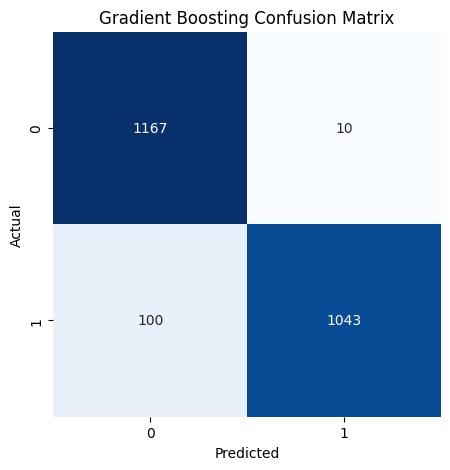

In [16]:
# Gradient Boosting
gradient_boosting_clf = GradientBoostingClassifier(random_state=42)
gradient_boosting_clf.fit(X_train_tfidf, y_train)
gradient_boosting_pred = gradient_boosting_clf.predict(X_test_tfidf)
gradient_boosting_accuracy = accuracy_score(y_test, gradient_boosting_pred)
gradient_boosting_report = classification_report(y_test, gradient_boosting_pred)
gradient_boosting_cm = confusion_matrix(y_test, gradient_boosting_pred)

print("Gradient Boosting Results:")
print(f"Accuracy: {gradient_boosting_accuracy}")
print("Classification Report:")
print(gradient_boosting_report)
print("Confusion Matrix:")
print(gradient_boosting_cm)
plot_confusion_matrix(gradient_boosting_cm, 'Gradient Boosting Confusion Matrix')
print("\n" + "="*50 + "\n")

Recurrent Neural Networks (RNNs) Results:
Accuracy: 0.9280172413793103
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1177
           1       0.91      0.94      0.93      1143

    accuracy                           0.93      2320
   macro avg       0.93      0.93      0.93      2320
weighted avg       0.93      0.93      0.93      2320

Confusion Matrix:
[[1074  103]
 [  64 1079]]


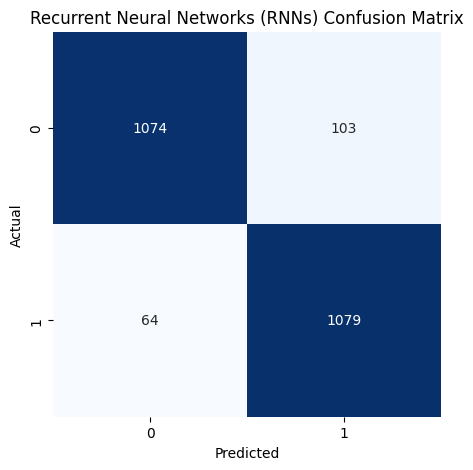

In [17]:
# Recurrent Neural Networks (RNNs) - Simple MLP
rnn_clf = MLPClassifier(random_state=42)
rnn_clf.fit(X_train_tfidf, y_train)
rnn_pred = rnn_clf.predict(X_test_tfidf)
rnn_accuracy = accuracy_score(y_test, rnn_pred)
rnn_report = classification_report(y_test, rnn_pred)
rnn_cm = confusion_matrix(y_test, rnn_pred)

print("Recurrent Neural Networks (RNNs) Results:")
print(f"Accuracy: {rnn_accuracy}")
print("Classification Report:")
print(rnn_report)
print("Confusion Matrix:")
print(rnn_cm)
plot_confusion_matrix(rnn_cm, 'Recurrent Neural Networks (RNNs) Confusion Matrix')
print("\n" + "="*50 + "\n")

In [38]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [39]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_length = 100  # Adjust the max_length as needed
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [40]:
# Build LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_length))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))


In [41]:
# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
# Train the model
lstm_model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))


Epoch 1/5
170/170 [==============================] - 18s 90ms/step - loss: 0.5395 - accuracy: 0.7633 - val_loss: 0.5866 - val_accuracy: 0.6250
Epoch 2/5
170/170 [==============================] - 15s 87ms/step - loss: 0.4503 - accuracy: 0.7736 - val_loss: 0.5517 - val_accuracy: 0.6961
Epoch 3/5
170/170 [==============================] - 19s 109ms/step - loss: 0.3013 - accuracy: 0.8873 - val_loss: 0.2079 - val_accuracy: 0.9280
Epoch 4/5
170/170 [==============================] - 14s 83ms/step - loss: 0.1537 - accuracy: 0.9508 - val_loss: 0.1444 - val_accuracy: 0.9530
Epoch 5/5
170/170 [==============================] - 15s 85ms/step - loss: 0.0905 - accuracy: 0.9769 - val_loss: 0.1352 - val_accuracy: 0.9552


In [43]:
# Evaluate the model
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test_padded, y_test)
print("LSTM Results:")
print(f"Accuracy: {lstm_accuracy}")


73/73 [==============================] - 1s 15ms/step - loss: 0.1352 - accuracy: 0.9552
LSTM Results:
Accuracy: 0.9551724195480347


In [44]:
# Make predictions
lstm_pred = (lstm_model.predict(X_test_padded) > 0.5).astype("int32")


73/73 [==============================] - 1s 15ms/step


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      1177
           1       0.94      0.97      0.96      1143

    accuracy                           0.96      2320
   macro avg       0.96      0.96      0.96      2320
weighted avg       0.96      0.96      0.96      2320

Confusion Matrix:
[[1112   65]
 [  39 1104]]


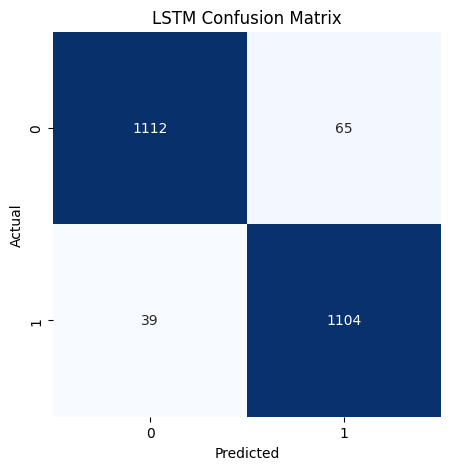

In [45]:
# Generate classification report and confusion matrix
lstm_report = classification_report(y_test, lstm_pred)
lstm_cm = confusion_matrix(y_test, lstm_pred)

print("Classification Report:")
print(lstm_report)
print("Confusion Matrix:")
print(lstm_cm)
plot_confusion_matrix(lstm_cm, 'LSTM Confusion Matrix')

# **New **

In [46]:
pip install plotly


In [47]:
# List of classifier names and their accuracies
classifier_names = [ 'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'Recurrent Neural Networks (RNNs) - Simple MLP',
    'Long Short-Term Memory Networks (LSTMs)']
accuracies = [ logistic_accuracy, random_forest_accuracy, gradient_boosting_accuracy, rnn_accuracy, lstm_accuracy]


In [51]:
import plotly.express as px

# Create a DataFrame for accuracies
df_accuracies = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracies using Plotly
fig = px.bar(df_accuracies, x='Classifier', y='Accuracy', color='Accuracy',
             labels={'Accuracy': 'Accuracy Score'},
             title='Classifier Accuracy Comparison')

# Add text annotations to the top of each bar
for i, acc in enumerate(accuracies):
    fig.add_annotation(x=classifier_names[i], y=acc, text=f'{acc:.2f}', showarrow=False, yshift=10)

# Show the figure
fig.show()


Last Part also for USer

In [26]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Placeholder values (you may need to adjust these based on your dataset)
vocab_size = 10000
embedding_dim = 100
max_length = 50

In [27]:
# Tokenize and pad the sequences for LSTM
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')


In [28]:
# Initialize classifiers
classifiers = [
    LogisticRegression(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    MLPClassifier(random_state=42),
    Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_length),
        LSTM(100),
        Dense(1, activation='sigmoid')
    ])
]

classifier_names = [
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'Recurrent Neural Networks (RNNs) - Simple MLP',
    'Long Short-Term Memory Networks (LSTMs)',
]

In [29]:
# Train and evaluate classifiers
accuracies = []

for i, classifier in enumerate(classifiers):
    if i == 4:  # Check if it's the LSTM model
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        classifier.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))
        lstm_loss, lstm_accuracy = classifier.evaluate(X_test_padded, y_test)
        accuracies.append(lstm_accuracy)
        print(f"Accuracy of Long Short-Term Memory Networks (LSTMs): {lstm_accuracy:.2f}")
    else:
        classifier.fit(X_train_tfidf, y_train)
        y_pred = classifier.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy of {type(classifier).__name__}: {accuracy:.2f}")


Accuracy of LogisticRegression: 0.96
Accuracy of RandomForestClassifier: 0.96
Accuracy of GradientBoostingClassifier: 0.95
Accuracy of MLPClassifier: 0.93
Epoch 1/5
170/170 [==============================] - 15s 74ms/step - loss: 0.3336 - accuracy: 0.8658 - val_loss: 0.2056 - val_accuracy: 0.9362
Epoch 2/5
170/170 [==============================] - 11s 63ms/step - loss: 0.1133 - accuracy: 0.9665 - val_loss: 0.2325 - val_accuracy: 0.9168
Epoch 3/5
170/170 [==============================] - 12s 72ms/step - loss: 0.0770 - accuracy: 0.9782 - val_loss: 0.1589 - val_accuracy: 0.9517
Epoch 4/5
170/170 [==============================] - 12s 73ms/step - loss: 0.0549 - accuracy: 0.9854 - val_loss: 0.2144 - val_accuracy: 0.9414
Epoch 5/5
73/73 [==============================] - 1s 19ms/step - loss: 0.2287 - accuracy: 0.9004
Accuracy of Long Short-Term Memory Networks (LSTMs): 0.90


Length of classifier_names: 5
Length of accuracies: 5


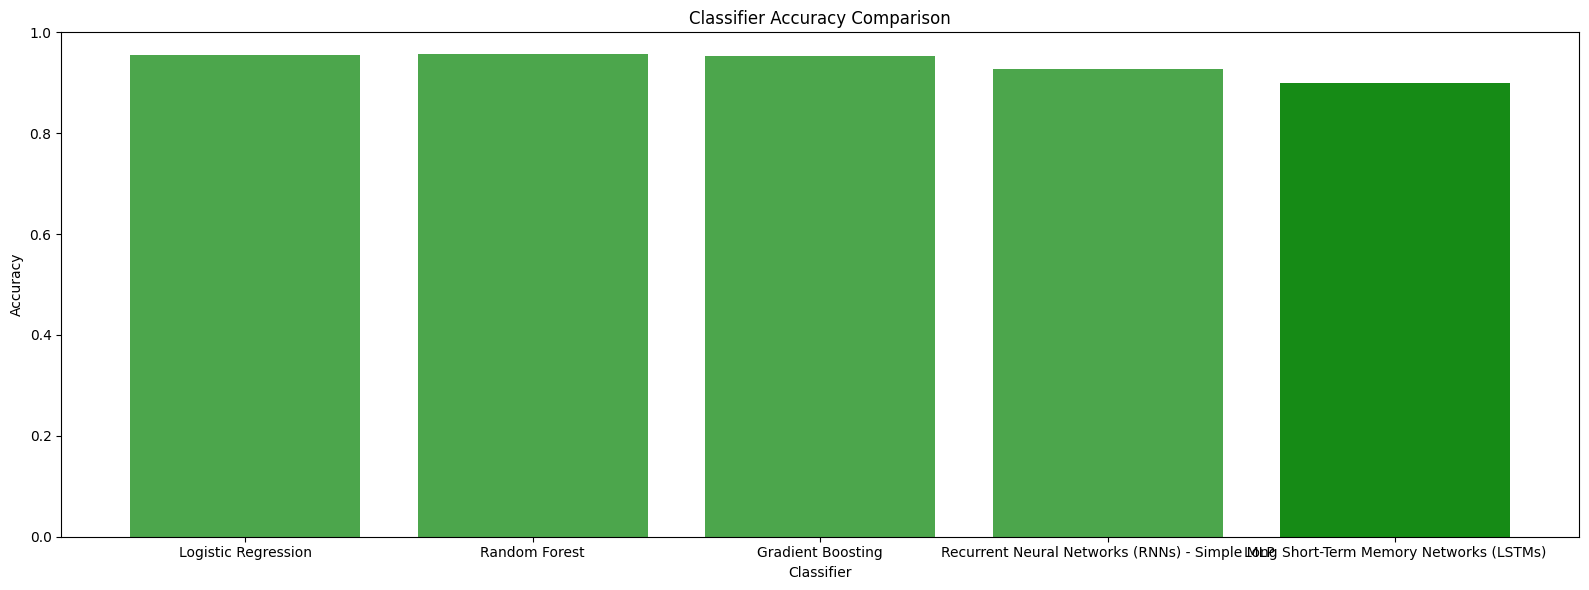

In [30]:
# Print lengths before creating the bar chart
print("Length of classifier_names:", len(classifier_names))
print("Length of accuracies:", len(accuracies))

# Update the visualization of accuracies for all classifiers
plt.figure(figsize=(16, 6))
accuracies.append(lstm_accuracy)  # Append LSTM accuracy to the list
classifier_names.append('Long Short-Term Memory Networks (LSTMs)')  # Append LSTM name to the list

plt.bar(classifier_names, accuracies, color='green', alpha=0.7)
plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.tight_layout()
plt.show()


In [37]:
import plotly.express as px

# Create a DataFrame for accuracies
df_accuracies = pd.DataFrame({'Classifier': classifier_names, 'Accuracy': accuracies})

# Plot the accuracies using Plotly
fig = px.bar(df_accuracies, x='Classifier', y='Accuracy', color='Accuracy',
             labels={'Accuracy': 'Accuracy Score'},
             title='Classifier Accuracy Comparison')

# Add text annotations to the top of each bar
for i, acc in enumerate(accuracies):
    fig.add_annotation(x=classifier_names[i], y=acc, text=f'{acc:.2f}', showarrow=False, yshift=10)

# Show the figure
fig.show()


In [31]:
# Input text for testing (modify this as needed)
input_text = ["I feel so overwhelmed by everything in my life right now."]


In [32]:
# Make predictions for the input text using each classifier
logistic_regression_result = classifiers[0].predict(tfidf_vectorizer.transform(input_text))
random_forest_result = classifiers[1].predict(tfidf_vectorizer.transform(input_text))
gradient_boosting_result = classifiers[2].predict(tfidf_vectorizer.transform(input_text))
mlp_result = classifiers[3].predict(tfidf_vectorizer.transform(input_text))
lstm_result = classifiers[4].predict(X_test_padded)  # Assuming X_test_padded is your padded input for LSTM


73/73 [==============================] - 1s 14ms/step


In [33]:
# Print the numerical results
print("Logistic Regression Result:", logistic_regression_result[0])
print("Random Forest Result:", random_forest_result[0])
print("Gradient Boosting Result:", gradient_boosting_result[0])
print("MLP Result:", mlp_result[0])
print("LSTM Result:", lstm_result[0])

Logistic Regression Result: 1
Random Forest Result: 0
Gradient Boosting Result: 0
MLP Result: 1
LSTM Result: [0.93596256]


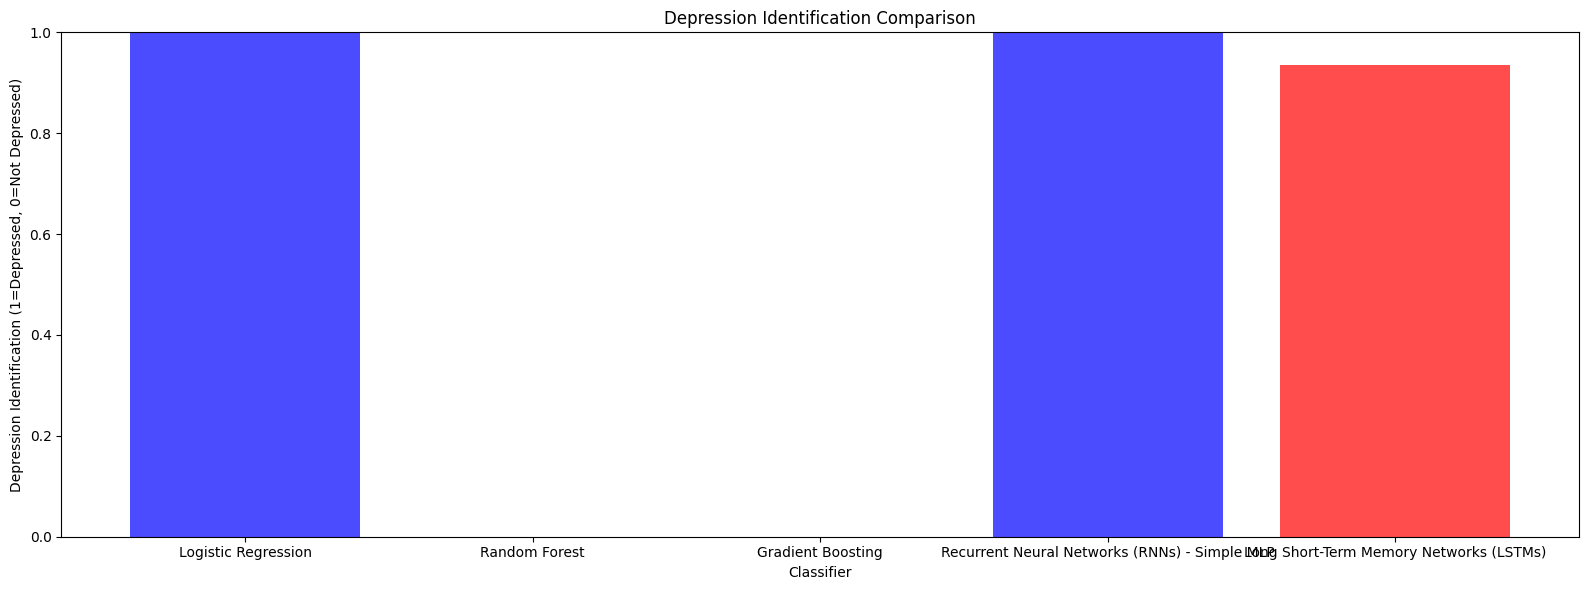

In [34]:
# Visualize the results for all classifiers
plt.figure(figsize=(16, 6))
classifier_names = [
    'Logistic Regression',
    'Random Forest',
    'Gradient Boosting',
    'Recurrent Neural Networks (RNNs) - Simple MLP',
    'Long Short-Term Memory Networks (LSTMs)',
]

results = [logistic_regression_result[0], random_forest_result[0], gradient_boosting_result[0], mlp_result[0], lstm_result[0]]
plt.bar(classifier_names[0:4], results[0:4], color='blue', alpha=0.7)  # Exclude LSTMs from visualization
plt.bar(classifier_names[4], results[4], color='red', alpha=0.7)  # LSTMs in a different color
plt.ylim(0, 1)
plt.xlabel('Classifier')
plt.ylabel('Depression Identification (1=Depressed, 0=Not Depressed)')
plt.title('Depression Identification Comparison')
plt.tight_layout()
plt.show()